In [1]:
# importing the necessary package and the mnist dataset
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 

mnist = tf.keras.datasets.mnist # 28 x 28 images of hand-written numbers
(x_training, y_training ), (x_test, y_test) = mnist.load_data()


In [2]:
# splitting the dataset in training (50000 examples) and testing (10000 examples)

x_train = x_training[0:50000]
y_train = y_training[0:50000]

x_val = x_training[-10000:]
y_val = y_training[-10000:]

# normalizing the dataset
# x_train = tf.keras.utils.normalize(x_train, axis=1)
# x_test  = tf.keras.utils.normalize(x_test,  axis=1)

# normalizing the training, validation, and testing dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_training = tf.keras.utils.normalize(x_training, axis=1)
x_val   = tf.keras.utils.normalize(x_val ,axis=1)
x_test  = tf.keras.utils.normalize(x_test,  axis=1)

# plt.imshow(x_val[0])
# plt.show()

# unique, counts = np.unique(y_test, return_counts=True)
# dict(zip(unique, counts))

In [3]:
# creating the model and training it 

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

hmodel = model.fit(x_train, y_train, epochs = 3, validation_data = (x_val,y_val))

# model.save('number_recog.model')
# new_model = tf.keras.models.load_model('number_recog.model')

Epoch 1/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5134 - accuracy: 0.8562 - val_loss: 0.1375 - val_accuracy: 0.9589
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1219 - accuracy: 0.9628 - val_loss: 0.1106 - val_accuracy: 0.9671
Epoch 3/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0763 - accuracy: 0.9764 - val_loss: 0.1016 - val_accuracy: 0.9681


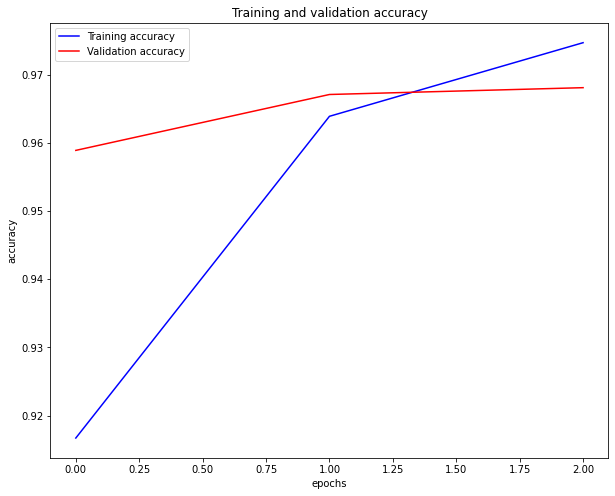

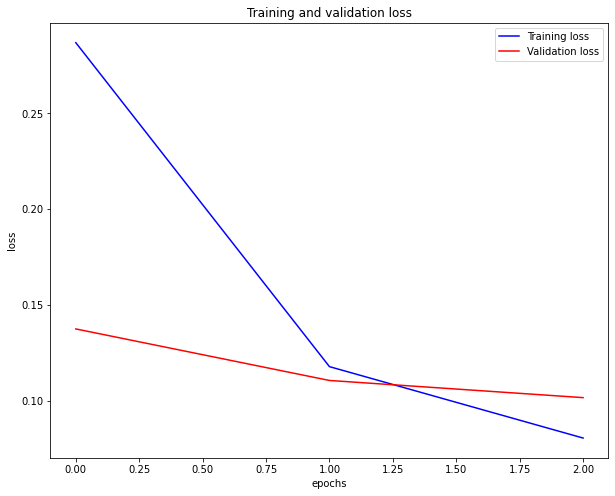

In [4]:
# code block the show trainig-validation loss and accuracy 

accuracy = hmodel.history['accuracy']
val_accuracy = hmodel.history['val_accuracy']
loss = hmodel.history['loss']
val_loss = hmodel.history['val_loss']
epochs = range(len(accuracy))

fig = plt.figure(figsize=(10,8)) 
plt.plot(epochs, accuracy, 'b', label = 'Training accuracy')
plt.plot(epochs,val_accuracy,'r', label= 'Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
# txt = "Fig 1.b : "               # captioning the figure
# fig.text(.5, .05, txt, ha='center')
plt.legend()
plt.show()


fig = plt.figure(figsize=(10,8))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs,val_loss,'r', label= 'Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [5]:
# testing the trained model on testing dataset

test_loss, test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1005 - accuracy: 0.9686


In [7]:
# creating rand_test array that contains images built from random generator numbers as pixels

rand_test = [ ]

for _ in range(15000):
    example = np.random.rand(28,28)
    rand_test.append(example)

# predicting of rand_test
rand_test = np.array(rand_test)
pred = model.predict([rand_test])

In [8]:
# getting the final prediction

final_predict = [ ]
for i in range(15000):
    x = np.argmax(pred[i])
    final_predict.append(x)
    
unique, counts = np.unique(final_predict, return_counts=True)
dict(zip(unique, counts))
    

{0: 34, 2: 16, 3: 7173, 5: 2, 8: 7775}